In [30]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [31]:
side = 20
sw = nx.navigable_small_world_graph(side, p=3, q=5)
options = {
#     'node_color': 'black',
    'node_size': 70,
    'width': 1,
}
#nx.draw(sw, **options)

In [32]:
def vertex_num(vertex):
    return vertex[0] * 6 + vertex[1]

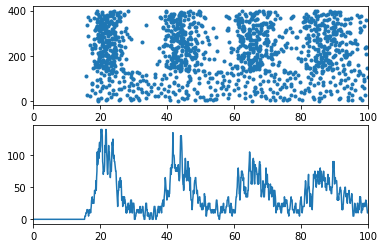

In [33]:
from brian2 import *

N = side ** 2
Vr = 10*mV
theta = 20*mV
tau = 20*ms
delta = 2*ms
taurefr = 2*ms
duration = .1*second
C = 1000
sparseness = float(C)/N
J = .1*mV
muext = 25*mV
sigmaext = 1*mV

eqs = """
dV/dt = (-V+muext + sigmaext * sqrt(tau) * xi)/tau : volt
"""

group = NeuronGroup(N, eqs, threshold='V>theta',
                    reset='V=Vr', refractory=taurefr, method='euler')
group.V = Vr

    
syn = Synapses(group, group, 'w : 1', on_pre='V += -J')
for edge in sw.edges:
    syn.connect(i=vertex_num(edge[0]), j=vertex_num(edge[1]))
    syn.w = 'j*0.2'




#conn = Synapses(group, group, on_pre='V += -J', delay=delta)
#conn.connect(p=sparseness)
M = SpikeMonitor(group)
LFP = PopulationRateMonitor(group)
net = Network(group, syn, M, LFP)
net.run(duration)

subplot(211)
plot(M.t/ms, M.i, '.')
xlim(0, duration/ms)

subplot(212)
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)
xlim(0, duration/ms)

show()

In [34]:
a = [1, 2, 3]
print(sum(a))

6


In [35]:
print(len(syn.i), len(syn.j), len(syn.w))

9399 9399 9399


In [36]:
syn.i

<synapses_3.i: array([  0,   0,   0, ..., 131, 131, 131])>

In [37]:
i = 0
k = 0
max_sum = 0
summ = 0
for i in range(10):
    if syn.i[i] == k:
        print(1)
        summ += syn.w[i]
        print("sinw ",  syn.w[i], summ)
    else:
        print(2)
        if summ > max_sum:
            max_sum = summ
        k += 1
        summ = syn.w[i]
    print(3)
    print(i, k, syn.i[i], syn.w[i], summ, max_sum)

    # я не уверен, что оно ок работает для последнего нейрона
    # и еще надо добавить получение координат

print(max_sum)

1
sinw  0.2 0.2
3
0 0 0 0.2 0.2 0
1
sinw  0.4 0.6000000000000001
3
1 0 0 0.4 0.6000000000000001 0
1
sinw  0.6000000000000001 1.2000000000000002
3
2 0 0 0.6000000000000001 1.2000000000000002 0
1
sinw  1.2000000000000002 2.4000000000000004
3
3 0 0 1.2000000000000002 2.4000000000000004 0
1
sinw  1.4000000000000001 3.8000000000000007
3
4 0 0 1.4000000000000001 3.8000000000000007 0
1
sinw  1.6 5.4
3
5 0 0 1.6 5.4 0
1
sinw  2.4000000000000004 7.800000000000001
3
6 0 0 2.4000000000000004 7.800000000000001 0
1
sinw  2.6 10.4
3
7 0 0 2.6 10.4 0
1
sinw  3.6 14.0
3
8 0 0 3.6 14.0 0
1
sinw  2.8000000000000003 16.8
3
9 0 0 2.8000000000000003 16.8 0
0


WARNING    C:\Anaconda\envs\neuro\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 [py.warnings]


KeyboardInterrupt: 

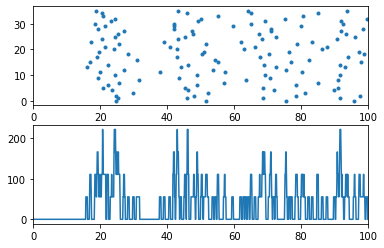

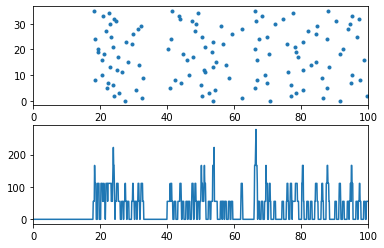

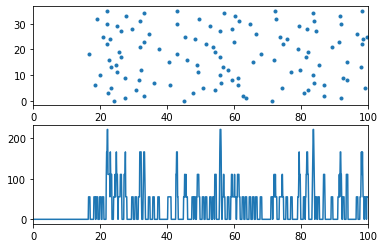

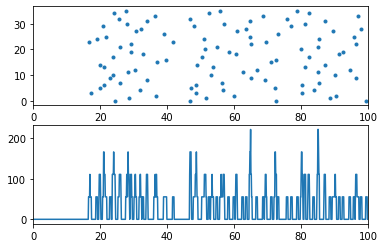

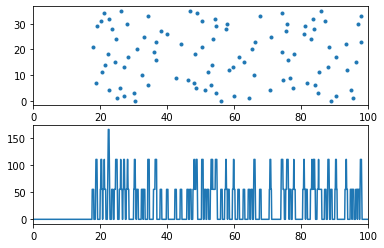

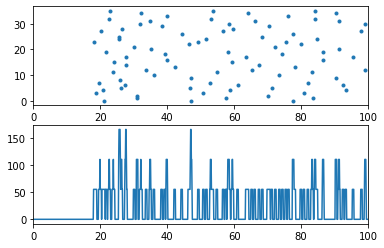

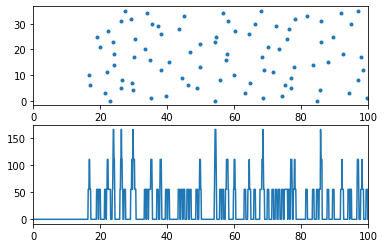

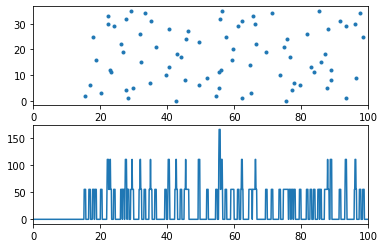

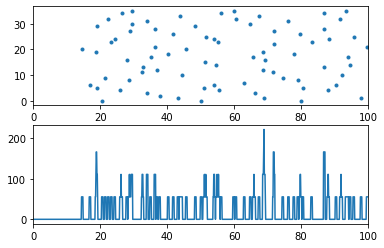

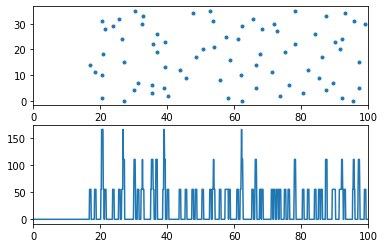

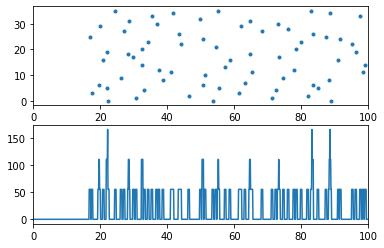

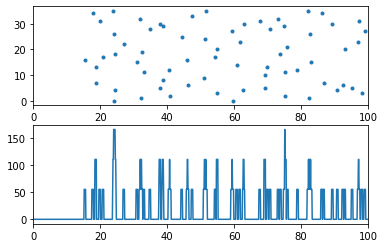

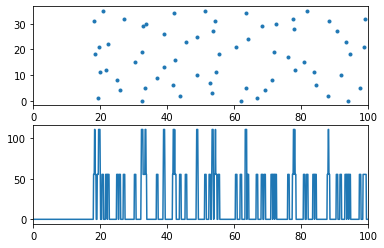

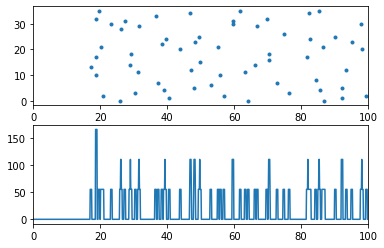

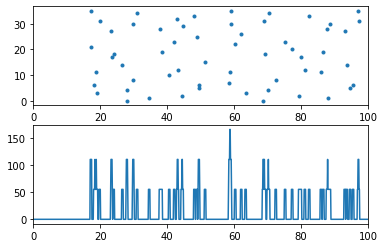

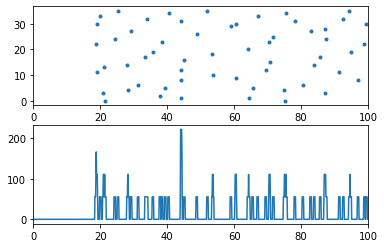

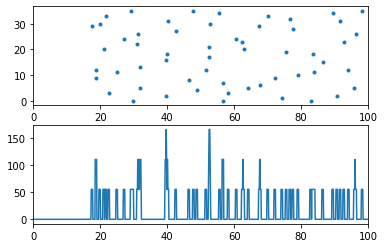

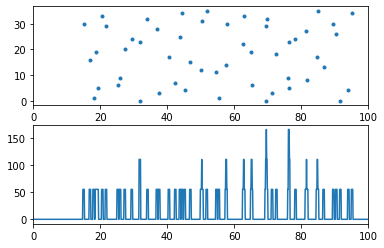

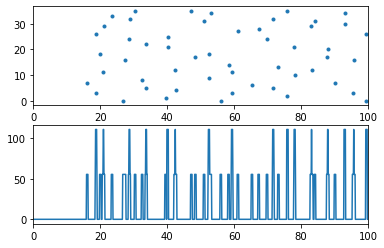

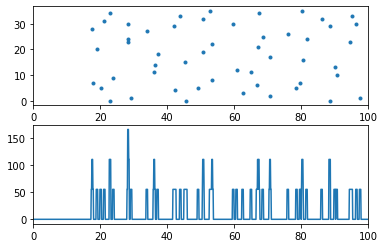

Error in callback <function flush_figures at 0x000002892DE4B1E0> (for post_execute):


KeyboardInterrupt: 

In [51]:
#q - дальние связи
#p - ближние связи
#J - сила связи

N = side ** 2
Vr = 10*mV
theta = 20*mV
tau = 20*ms
delta = 2*ms
taurefr = 2*ms
duration = .1*second
C = 1000
sparseness = float(C)/N
J = .1*mV
muext = 25*mV
sigmaext = 1*mV

for p in range(2, 5):
    for q in range(1, 7):
        for k in range(1, 21):
            J = k/10*mV
            side = 6
            sw = nx.navigable_small_world_graph(side, p, q)
            options = {
            #     'node_color': 'black',
            'node_size': 70,
            'width': 1,
            }
            
            eqs = """
            dV/dt = (-V+muext + sigmaext * sqrt(tau) * xi)/tau : volt
            """

            group = NeuronGroup(N, eqs, threshold='V>theta',
                                reset='V=Vr', refractory=taurefr, method='euler')
            group.V = Vr


            syn = Synapses(group, group, 'w : 1', on_pre='V += -J')
            for edge in sw.edges:
                syn.connect(i=vertex_num(edge[0]), j=vertex_num(edge[1]))
                syn.w = 'j*0.2'




            #conn = Synapses(group, group, on_pre='V += -J', delay=delta)
            #conn.connect(p=sparseness)
            M = SpikeMonitor(group)
            LFP = PopulationRateMonitor(group)
            net = Network(group, syn, M, LFP)
            net.run(duration)
            figure()
            subplot(211)
            plot(M.t/ms, M.i, '.')
            xlim(0, duration/ms)

            subplot(212)
            plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)
            xlim(0, duration/ms)
            file_name = 'graphics/p='+str(p)+', q='+str(q)+', J='+str(J)+'.png'
            #print(file_name)
            savefig(file_name)
            
            
            
            
            
            

graphics/p=2, q=3, J=1.png


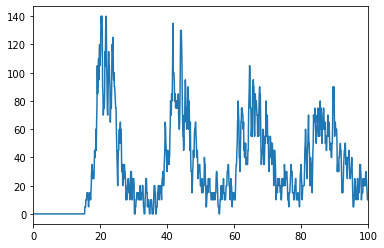

In [41]:
p=2
q=3
J=1
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)
xlim(0, duration/ms)
file_name = 'graphics/p='+str(p)+', q='+str(q)+', J='+str(J)+'.png'
print(file_name)
savefig(file_name)

In [ ]:
def find_min_max(count=4, start=20, dist=10):
    maxs = [0] * count
    mins = [float('inf')] * count
    last_max_j, last_min_j = 0, 0
    for j in range(len(LFP.smooth_rate(window='flat', width=10*ms)/Hz)):
        elem = list(LFP.smooth_rate(window='flat', width=10*ms)/Hz)[j]
        for i in range(len(maxs)):
            if j - last_max_j > dist and elem > maxs[i]:
                maxs[i + 1:] = maxs[i:-1].copy()
                maxs[i] = elem
                last_max_j = j
                break
        for i in range(len(mins)):
            if list(LFP.t/ms)[j] > start and j - last_min_j > dist and elem < mins[i]:
                mins[i + 1:] = mins[i:-1].copy()
                mins[i] = elem
                last_min_j = j
                break
    return maxs, mins

In [ ]:
def find_sum(lis):
    #lis = [LPF.t[li[0]], LPF.t[li[1]], LPF.t[li[2]], LPF.t[li[3]]]
    return (lis[0]-lis[1])**2+(lis[0]-lis[2])**2+(lis[0]-lis[3])**2+(lis[1]-lis[2])**2+(lis[1]-lis[3])**2+(lis[2]-lis[3])**2

In [ ]:
N = side ** 2
Vr = 10*mV
theta = 20*mV
tau = 20*ms
delta = 2*ms
taurefr = 2*ms
duration = .1*second
C = 1000
sparseness = float(C)/N
J = .1*mV
muext = 25*mV
sigmaext = 1*mV

max_list = []
min_list = []
name_list = []
best_index = -1
best_name = ''
best_max = -1
flag = True
for p in range(2, 5):
    for q in range(1, 7):
        for k in range(1, 21):
            J = k/10*mV
            side = 6
            sw = nx.navigable_small_world_graph(side, p, q)
            options = {
            #     'node_color': 'black',
            'node_size': 70,
            'width': 1,
            }
            
            eqs = """
            dV/dt = (-V+muext + sigmaext * sqrt(tau) * xi)/tau : volt
            """

            group = NeuronGroup(N, eqs, threshold='V>theta',
                                reset='V=Vr', refractory=taurefr, method='euler')
            group.V = Vr


            syn = Synapses(group, group, 'w : 1', on_pre='V += -J')
            for edge in sw.edges:
                syn.connect(i=vertex_num(edge[0]), j=vertex_num(edge[1]))
                syn.w = 'j*0.2'




            #conn = Synapses(group, group, on_pre='V += -J', delay=delta)
            #conn.connect(p=sparseness)
            M = SpikeMonitor(group)
            LFP = PopulationRateMonitor(group)
            net = Network(group, syn, M, LFP)
            net.run(duration)
            #figure()
            #subplot(211)
            #plot(M.t/ms, M.i, '.')
            #xlim(0, duration/ms)

            #subplot(212)
            #plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)
            #xlim(0, duration/ms)
            #file_name = 'graphics/p='+str(p)+', q='+str(q)+', J='+str(J)+'.png'
            #print(file_name)
            #savefig(file_name)
            max_index, min_index = find_min_max(4)
            #name_item = str(p)+', q='+str(q)+', J='+str(J)
            max_item = []
            min_item = []
            for i in range(len(max_index)):
                max_item.append(LFP.t[max_index[i]])
                #min_item.append(LFP.t[min_index[i]])
            max_list.append(max_item)
            #min_list.append(min_item)
            name_list.append('p='+str(p)+', q='+str(q)+', J='+str(J))
            sum_item = find_sum(max_item)
            if flag:
                best_name = 'p='+str(p)+', q='+str(q)+', J='+str(J)
                best_max = sum_item
                best_index = 0
                flag = False
            else:
                if max_item < best_max:
                    best_max = sum_item
                    best_name = 'p='+str(p)+', q='+str(q)+', J='+str(J)
                    best_index = len(max_list)